In [1]:
import numpy as np
import pandas as pd
import os
import keras
import tensorflow as tf
from datetime import datetime
from tensorflow.keras import layers 
from tensorflow.keras import Model 
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt

In [ ]:
# # use for google Colab

# from google.colab import drive
# drive.mount('/content/drive')


In [ ]:
# use for google Colab
# !ls /content/drive/MyDrive/Regex_CNN_Project/dataset # check the folder TRAIN and TEST show using ls / dir  

In [ ]:
# use for google Colab
# !cd /content/drive/MyDrive/Regex_CNN_Project

In [2]:
# data_dir = '/content/drive/MyDrive/Regex_CNN_Project/dataset/' # use for google Colab
data_dir = './dataset/'
train_dir = data_dir + 'TRAIN'
test_dir = data_dir + 'TEST'
# parameters
img_width, img_height = 224, 224  # dimensions to which the images will be resized
batch_size = 32
num_epochs = 32
num_classes = 6  #categories of trash

In [3]:
from keras_preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale=1.0/255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip=True,rotation_range=30, validation_split=0.2,
width_shift_range=0.2, height_shift_range=0.2)
test_data_gen = ImageDataGenerator(rescale=1.0/255)

In [4]:
train_data = train_data_gen.flow_from_directory(train_dir, target_size = (img_width, img_height), batch_size = batch_size, class_mode="categorical",subset='training')

valid_data = train_data_gen.flow_from_directory(train_dir, target_size = (img_width, img_height), batch_size = batch_size, class_mode="categorical",subset='validation')

test_data = test_data_gen.flow_from_directory(test_dir, target_size = (img_width, img_height), batch_size = batch_size, class_mode="categorical")


Found 1603 images belonging to 6 classes.
Found 398 images belonging to 6 classes.
Found 0 images belonging to 0 classes.


In [5]:
train_data.class_indices

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}

In [6]:
train_data.image_shape

(224, 224, 3)

In [7]:
import matplotlib.pyplot as plt
def plot_imgs(item_dir, top=10):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:5]
  
    plt.figure(figsize=(10, 10))
  
    for idx, img_path in enumerate(item_files):
        plt.subplot(5, 5, idx+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray') 

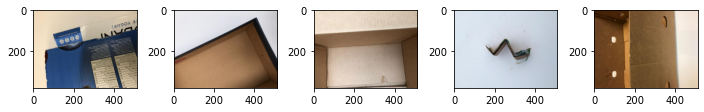

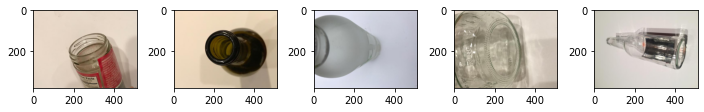

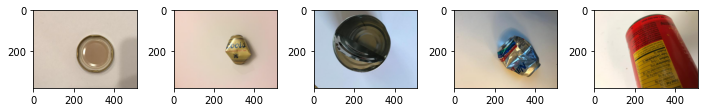

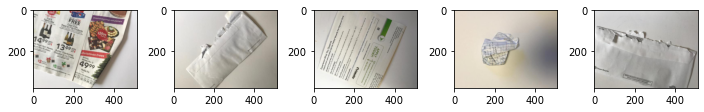

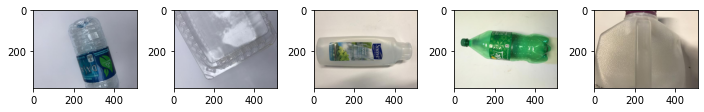

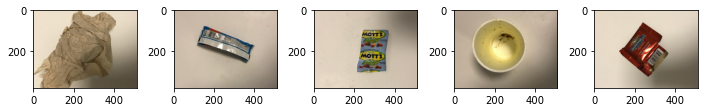

In [12]:
for k in train_data.class_indices.keys():
    plot_imgs(train_dir+'/' + k)